In [1]:
import pandas as pd
df = pd.read_excel('Data for classification.xlsx', shuffle=True)
df.drop('ID', axis=1, inplace=True)

In [2]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance

In [3]:
label=df['Target'].fillna(0)
label=label.astype('int')
df.drop('Target', axis=1, inplace=True)

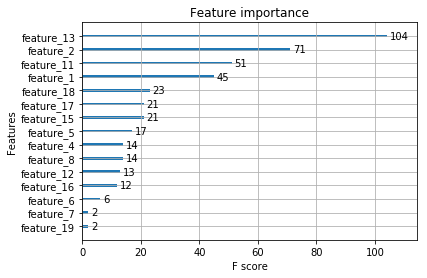

In [9]:
model = XGBClassifier()
from xgboost import plot_importance
model.fit(df, label)
plot_importance(model)

In [5]:

result = cross_val_score(model, df, label,  scoring='f1')
print result.mean()

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7415479656622108


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
df.drop('feature_3', axis=1, inplace=True)
df.drop('feature_14', axis=1, inplace=True)
df.drop('feature_9', axis=1, inplace=True)
# df.drop('feature_10', axis=1, inplace=True)

result = cross_val_score(model, df, label,  scoring='f1')
print result.mean()

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7454249452884246


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)


In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print"accuracy_score: "+str(acc)
print"f1_score: "+str(f1)


accuracy_score: 0.9409422694094227
f1_score: 0.7420289855072464


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
